### Coordinador.cl

https://comisionenergia-my.sharepoint.com/personal/infoestadistica_cne_cl/Documents/Forms/All.aspx?ga=1&RootFolder=%2Fpersonal%2Finfoestadistica%5Fcne%5Fcl%2FDocuments%2Fenergia%5Fabierta%2Fcatalogo%5Festadisticas%2Fcostos%5Fmarginales%2Fdiario&FolderCTID=0x012000FA8BCC0F450D1F40BD3ACC03BBE40750

In [34]:
import pandas as pd
import os
import plotly.express as px

# Directorio que contiene tus archivos CSV
directorio = r"C:\Users\Lenovo\Desktop\tesis\repositorio\cmg_history"

# Lista para almacenar cada DataFrame
dataframes = []

# Recorrer cada archivo en el directorio
for archivo in os.listdir(directorio):
    # Comprobar si el archivo es un CSV
    if archivo.endswith('.csv'):
        ruta_archivo = os.path.join(directorio, archivo)
        # Leer el archivo CSV
        df = pd.read_csv(ruta_archivo, sep=';')
        # Agregar el DataFrame a la lista
        dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
df_concatenado = pd.concat(dataframes)

# Crear la columna 'fecha' combinando 'anio', 'mes' y 'dia' como strings
df_concatenado['fecha'] = pd.to_datetime(df_concatenado['anio'].astype(str) + '-' +
                                         df_concatenado['mes'].astype(str) + '-' +
                                         df_concatenado['dia'].astype(str))

# Limpiar y convertir la columna 'valor' a float
df_concatenado['valor'] = df_concatenado['valor'].replace(',', '.', regex=True).astype(float)

# Ordenar el DataFrame por fecha de manera ascendente
df_concatenado = df_concatenado.sort_values(by='fecha')

# Crear un gráfico de Plotly
fig = px.line(df_concatenado, x='fecha', y='valor', color='barra', title='Comparación de Series de Tiempo por Categoría')

# Mostrar el gráfico
fig.show()


In [35]:
df_concatenado

,anio,mes,dia,barra,tension,valor,fecha
0,2008,2,1,ATACAMA_______220,220,159.28,2008-02-01
86,2008,2,1,CRUCERO_______220,220,163.29,2008-02-01
143,2008,2,1,P.MONTT_______220,220,250.97,2008-02-01
172,2008,2,1,QUILLOTA______220,220,255.71,2008-02-01
201,2008,2,1,TARAPACA______220,220,168.60,2008-02-01
...,...,...,...,...,...,...,...
14,2023,11,30,P.MONTT_______220,220,17.87,2023-11-30
151,2023,11,30,TARAPACA______220,220,44.00,2023-11-30
193,2023,11,30,P.AZUCAR______220,220,40.17,2023-11-30
179,2023,11,30,CARDONES______220,220,40.94,2023-11-30


### Análisis Descriptivo

In [36]:
# Agrupar por la columna 'barra' y calcular estadísticas descriptivas
analisis_por_barra = df_concatenado.groupby('barra')['valor'].describe()


In [38]:
analisis_por_barra

,count,mean,std,min,25%,50%,75%,max
barra,,,,,,,,
ATACAMA_______220,5675.0,80.992294,46.616038,0.0,49.5500,63.780,102.5100,440.91
CARDONES______220,5782.0,105.812274,71.168546,0.0,45.1725,87.770,152.5675,361.32
CHARRUA_______220,5782.0,103.466787,67.406517,0.0,49.9700,84.390,138.1750,374.48
CRUCERO_______220,5701.0,81.914285,47.922140,0.0,49.2900,63.830,104.6900,441.36
P.AZUCAR______220,5782.0,107.741736,69.643209,0.0,48.7600,90.520,151.1175,362.48
P.MONTT_______220,5782.0,120.468971,77.603829,0.0,53.5425,105.715,168.9350,398.50
QUILLOTA______220,5782.0,106.960425,65.393845,0.0,52.2800,91.745,143.4500,363.46
TARAPACA______220,5675.0,85.227810,50.191227,0.0,50.6400,66.080,109.6600,443.81


### Tendencia de Precios

In [39]:
# Calcular el precio medio diario
precio_medio_diario = df_concatenado.groupby('fecha')['valor'].mean().reset_index()

# Crear un gráfico de línea de tendencia con Plotly
fig_tendencia = px.line(precio_medio_diario, x='fecha', y='valor', title='Tendencia de Precios Promedio Diarios (220 kV)')
fig_tendencia.show()


In [40]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL de la página
url = 'https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php'

# Enviar una solicitud a la página
response = requests.get(url)

# Analizar el contenido HTML
soup = BeautifulSoup(response.content, 'html.parser')

# Encontrar la tabla
table = soup.find('table', {'border': '1', 'align': 'center'})

# Leer la tabla en un DataFrame
df = pd.read_html(str(table))[0]

# Establecer la primera fila como encabezado
df.columns = df.iloc[0]

# Eliminar filas que contengan strings en lugar de números (filas de encabezado repetidas)
df = df[~df['Year'].str.isalpha()]

# Convertir la columna 'Year' a entero
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Crear una serie de tiempo a partir del DataFrame
df_melted = df.melt(id_vars=['Year'], var_name='Month', value_name='Temperature')

# Mapeo de los códigos de mes a los meses correspondientes
month_mapping = {
    'DJF': '12', 'JFM': '01', 'FMA': '02', 'MAM': '03',
    'AMJ': '04', 'MJJ': '05', 'JJA': '06', 'JAS': '07',
    'ASO': '08', 'SON': '09', 'OND': '10', 'NDJ': '11'
}

df_melted['Month'] = df_melted['Month'].map(month_mapping)

# Ajustar el año para los meses de diciembre (DJF)
df_melted.loc[df_melted['Month'] == '12', 'Year'] = df_melted['Year'].astype(int) - 1

# Crear una columna de fecha con formato 'mes-año'
df_melted['Date'] = pd.to_datetime(df_melted['Year'].astype(str) + '-' + df_melted['Month'], format='%Y-%m').dt.to_period('M')
df_melted['Temperature'] = pd.to_numeric(df_melted['Temperature'], errors='coerce')

# Ordenar y mostrar el DataFrame resultante
df_melted = df_melted.sort_values(by='Date').drop(columns=['Year', 'Month'])

# Crear una columna 'Condition' basada en el valor de 'Temperature'
df_melted['Condition'] = df_melted['Temperature'].apply(lambda x: 'La Niña' if x < 0 else 'El Niño')


In [41]:
df_melted.dtypes

Temperature      float64
Date           period[M]
Condition         object
dtype: object

In [42]:
df_melted

,Temperature,Date,Condition
0,-1.5,1949-12,La Niña
74,-1.3,1950-01,La Niña
148,-1.2,1950-02,La Niña
222,-1.2,1950-03,La Niña
296,-1.1,1950-04,La Niña
...,...,...,...
591,1.3,2023-07,El Niño
665,1.6,2023-08,El Niño
739,1.8,2023-09,El Niño
813,NaN,2023-10,El Niño


In [43]:
df_unido

,fecha,valor,Temperature,Date,Condition
0,2016-01-01,32.60875,2.1,2016-01-01,El Niño
1,2016-01-02,35.25875,NaN,NaT,NaN
2,2016-01-03,35.62375,NaN,NaT,NaN
3,2016-01-04,43.87375,NaN,NaT,NaN
4,2016-01-05,54.07250,NaN,NaT,NaN
...,...,...,...,...,...
2886,2023-11-26,37.33250,NaN,NaT,NaN
2887,2023-11-27,45.60750,NaN,NaT,NaN
2888,2023-11-28,34.50500,NaN,NaT,NaN
2889,2023-11-29,29.79875,NaN,NaT,NaN


In [44]:
# Convertir 'Date' en df_melted a datetime para coincidir con 'fecha' en df_concatenado
df_melted['Date'] = pd.to_datetime(df_melted['Date'].astype(str))

# Unir los DataFrames
df_unido = pd.merge(df_concatenado, df_melted, left_on='fecha', right_on='Date', how='left')

# Crear el gráfico de tendencia con marcas para El Niño y La Niña
fig = px.line(df_unido, x='fecha', y='valor', color='Condition', title='Precios con Periodos de El Niño y La Niña')
fig.show()


In [45]:
# Calcular estadísticas descriptivas para cada condición
estadisticas_nino_nina = df_unido.groupby('Condition')['valor'].describe()


In [46]:
estadisticas_nino_nina

,count,mean,std,min,25%,50%,75%,max
Condition,,,,,,,,
El Niño,646.0,80.836393,45.872087,0.0,45.420,61.09,105.67,298.12
La Niña,867.0,108.470185,71.937019,0.0,52.075,83.88,146.57,377.90


In [47]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Suponiendo que df_concatenado y df_melted ya están cargados y preparados
# Asegurarse de que las fechas están en formato adecuado
df_melted['Date'] = pd.to_datetime(df_melted['Date'].astype(str))
df_concatenado['fecha'] = pd.to_datetime(df_concatenado['fecha'])

# Calcular el precio medio diario
precio_medio_diario = df_concatenado.groupby('fecha')['valor'].mean().reset_index()

# Unir los DataFrames
df_unido = pd.merge(precio_medio_diario, df_melted, left_on='fecha', right_on='Date', how='left')

# Crear el gráfico de tendencia
fig = go.Figure()

# Agregar la línea de tendencia para los precios
fig.add_trace(go.Scatter(x=df_unido['fecha'], y=df_unido['valor'], mode='lines', name='Precio'))

# Agregar áreas sombreadas para El Niño y La Niña
for condition in ['El Niño', 'La Niña']:
    df_condition = df_unido[df_unido['Condition'] == condition]
    if not df_condition.empty:
        fig.add_trace(go.Scatter(x=df_condition['fecha'], y=df_condition['valor'],
                                 mode='lines', fill='tozeroy', 
                                 name=condition))

# Actualizar el layout del gráfico
fig.update_layout(title='Precios con Periodos de El Niño y La Niña',
                  xaxis_title='Fecha',
                  yaxis_title='Precio Promedio Diario',
                  legend_title='Condición')

# Mostrar el gráfico
fig.show()



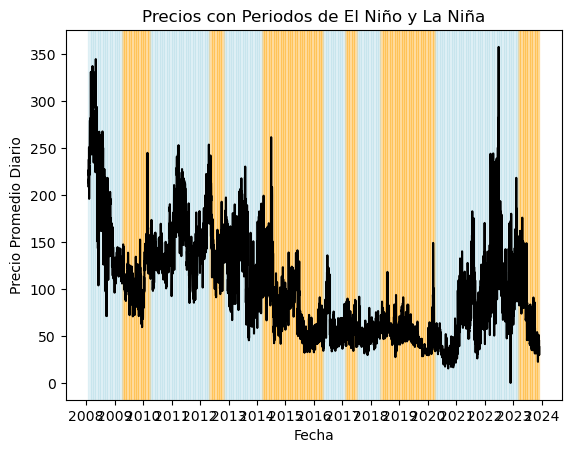

In [48]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Asumiendo que df_concatenado y df_melted están cargados y preparados

# Calcular el precio medio diario
precio_medio_diario = df_concatenado.groupby('fecha')['valor'].mean().reset_index()

# Unir los DataFrames
df_unido = pd.merge(precio_medio_diario, df_melted, left_on='fecha', right_on='Date', how='left')

# Crear la figura y el eje
fig, ax = plt.subplots()

# Dibujar rectángulos para El Niño y La Niña
for condition, color in [('El Niño', 'orange'), ('La Niña', 'lightblue')]:
    df_condition = df_unido[df_unido['Condition'] == condition]
    for _, row in df_condition.iterrows():
        ax.axvspan(row['Date'], row['Date'] + pd.DateOffset(months=1), color=color, alpha=0.3)

# Dibujar la línea de tendencia de precios
ax.plot('fecha', 'valor', data=df_unido, color='black')

# Formato del eje x
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Títulos y etiquetas
ax.set_title('Precios con Periodos de El Niño y La Niña')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio Promedio Diario')

# Mostrar el gráfico
plt.show()


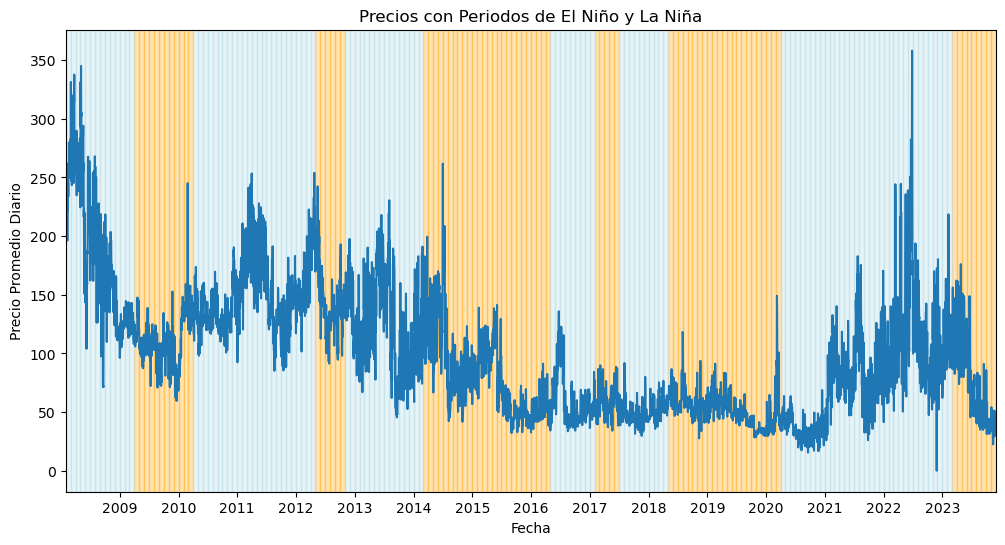

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Asumiendo que df_concatenado y df_melted están cargados y preparados

# Calcular el precio medio diario
precio_medio_diario = df_concatenado.groupby('fecha')['valor'].mean().reset_index()

# Unir los DataFrames
df_unido = pd.merge(precio_medio_diario, df_melted, left_on='fecha', right_on='Date', how='left')

# Crear la figura y el eje
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Dibujar el gráfico de línea con Seaborn
sns.lineplot(x='fecha', y='valor', data=df_unido, ax=ax)

# Añadir áreas sombreadas para El Niño y La Niña
for condition, color in [('El Niño', 'orange'), ('La Niña', 'lightblue')]:
    df_condition = df_unido[df_unido['Condition'] == condition]
    for _, row in df_condition.iterrows():
        ax.axvspan(row['Date'], row['Date'] + pd.DateOffset(months=1), color=color, alpha=0.3)

# Ajustar los límites del eje x para coincidir con el rango de fechas de los datos
ax.set_xlim(df_unido['fecha'].min(), df_unido['fecha'].max())

# Formato del eje x
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Títulos y etiquetas
ax.set_title('Precios con Periodos de El Niño y La Niña')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio Promedio Diario')

# Mostrar el gráfico
plt.show()


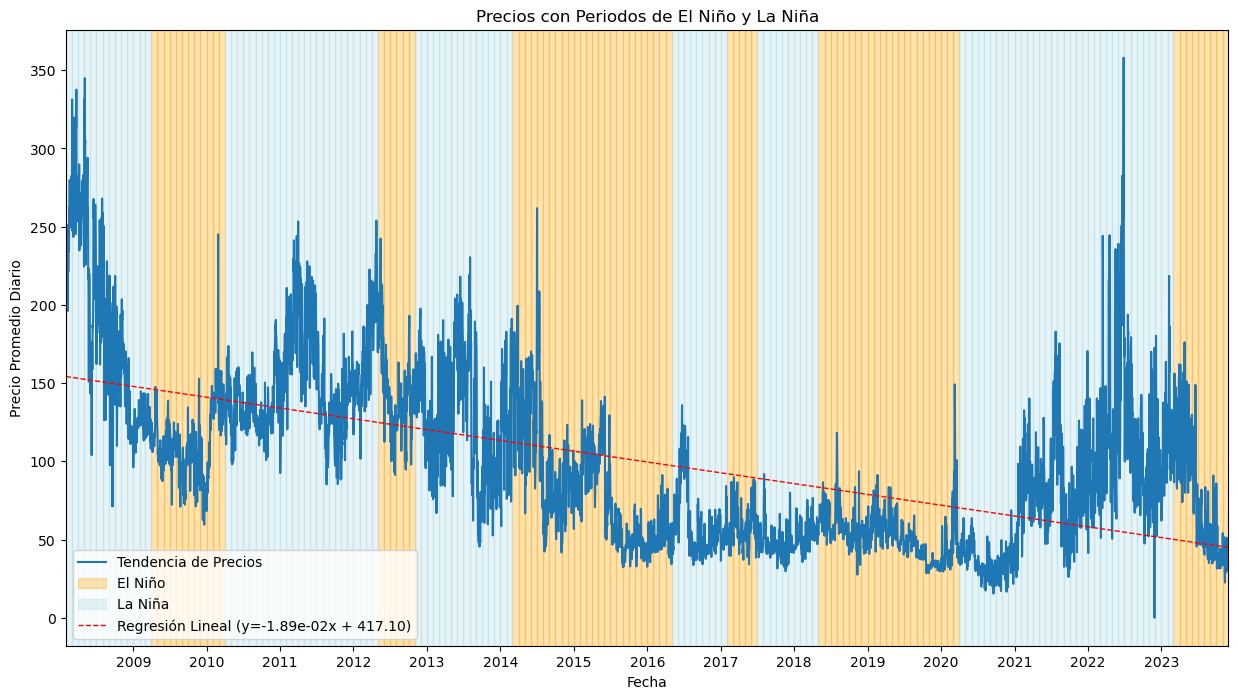

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

# Preparar los datos (se asume que df_concatenado y df_melted ya están cargados y preparados)
# ...

# Crear la figura y el eje
plt.figure(figsize=(15, 8))
ax = plt.gca()

# Dibujar el gráfico de línea con Seaborn
sns.lineplot(x='fecha', y='valor', data=df_unido, ax=ax, label='Tendencia de Precios')

# Añadir áreas sombreadas para El Niño y La Niña
for condition, color in [('El Niño', 'orange'), ('La Niña', 'lightblue')]:
    df_condition = df_unido[df_unido['Condition'] == condition]
    for _, row in df_condition.iterrows():
        ax.axvspan(row['Date'], row['Date'] + pd.DateOffset(months=1), color=color, alpha=0.3, label=condition)

# Calcular y dibujar la línea de tendencia lineal
x = mdates.date2num(df_unido['fecha'])
y = df_unido['valor']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax.plot(df_unido['fecha'], intercept + slope * x, label=f'Regresión Lineal (y={slope:.2e}x + {intercept:.2f})', 
        color='red', linestyle='--', linewidth=1)  # Estilo punteado y grosor más fino

# Ajustar los límites del eje x para coincidir con el rango de fechas de los datos
ax.set_xlim(df_unido['fecha'].min(), df_unido['fecha'].max())

# Formato del eje x
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Títulos y etiquetas
ax.set_title('Precios con Periodos de El Niño y La Niña')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio Promedio Diario')

# Mostrar la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Mostrar el gráfico
plt.show()


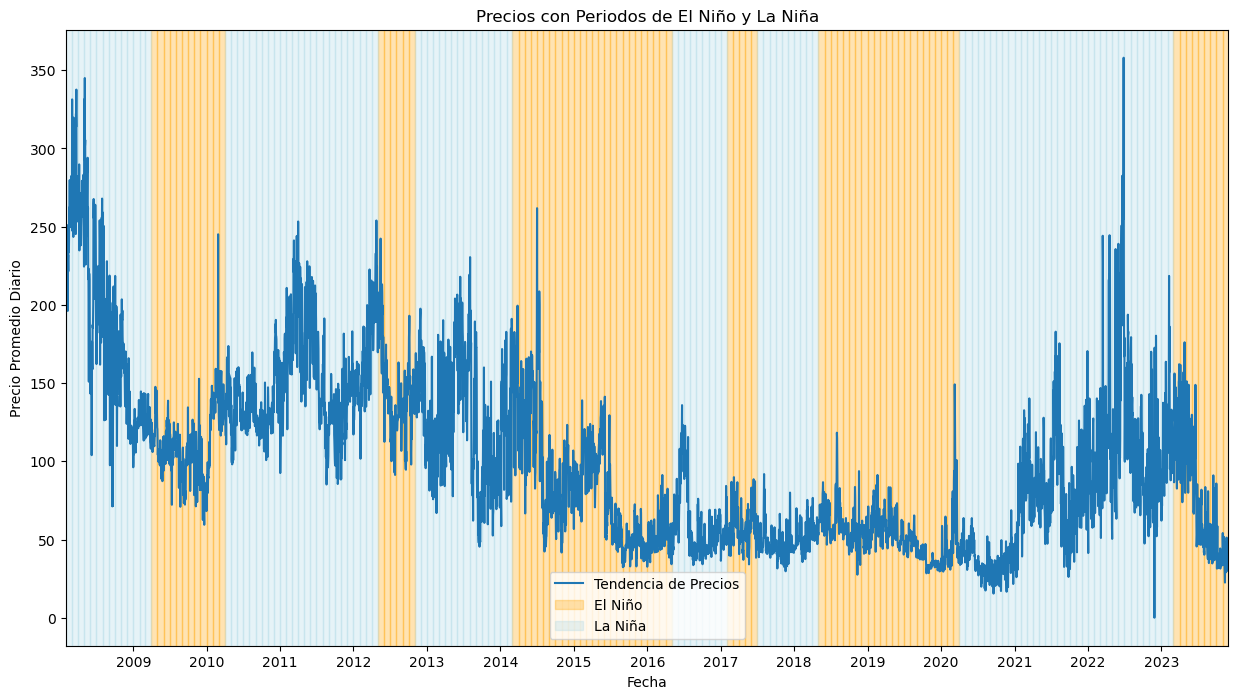

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

# Preparar los datos (se asume que df_concatenado y df_melted ya están cargados y preparados)
# ...

# Crear la figura y el eje
plt.figure(figsize=(15, 8))
ax = plt.gca()

# Dibujar el gráfico de línea con Seaborn
sns.lineplot(x='fecha', y='valor', data=df_unido, ax=ax, label='Tendencia de Precios')

# Añadir áreas sombreadas para El Niño y La Niña
for condition, color in [('El Niño', 'orange'), ('La Niña', 'lightblue')]:
    df_condition = df_unido[df_unido['Condition'] == condition]
    for _, row in df_condition.iterrows():
        ax.axvspan(row['Date'], row['Date'] + pd.DateOffset(months=1), color=color, alpha=0.3, label=condition)

# Calcular y dibujar la línea de tendencia lineal para cada periodo
for _, group in df_unido.groupby([(df_unido['Condition'] != df_unido['Condition'].shift()).cumsum()]):
    x = mdates.date2num(group['fecha'])
    y = group['valor']
    if len(x) > 1 and len(y) > 1:  # Necesitamos al menos dos puntos para calcular la regresión lineal
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        ax.plot(group['fecha'], intercept + slope * x, linestyle='--', linewidth=1)

# Ajustar los límites del eje x para coincidir con el rango de fechas de los datos
ax.set_xlim(df_unido['fecha'].min(), df_unido['fecha'].max())

# Formato del eje x
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Títulos y etiquetas
ax.set_title('Precios con Periodos de El Niño y La Niña')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio Promedio Diario')

# Mostrar la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Mostrar el gráfico
plt.show()


In [59]:
df_unido

,fecha,valor,Temperature,Date,Condition
0,2008-02-01,226.22250,-1.3,2008-02-01,La Niña
1,2008-02-02,224.57625,NaN,NaT,La Niña
2,2008-02-03,208.80125,NaN,NaT,La Niña
3,2008-02-04,217.09750,NaN,NaT,La Niña
4,2008-02-05,212.99125,NaN,NaT,La Niña
...,...,...,...,...,...
5777,2023-11-26,37.33250,NaN,NaT,El Niño
5778,2023-11-27,45.60750,NaN,NaT,El Niño
5779,2023-11-28,34.50500,NaN,NaT,El Niño
5780,2023-11-29,29.79875,NaN,NaT,El Niño


In [58]:
# Rellenar los valores NaN en la columna 'Condition' con la etiqueta de la última fila no NaN
df_unido['Condition'] = df_unido['Condition'].fillna(method='ffill')

# Ahora puedes verificar que los valores NaN han sido rellenados correctamente
print(df_unido.head())


       fecha      valor  Temperature       Date Condition
0 2008-02-01  226.22250         -1.3 2008-02-01   La Niña
1 2008-02-02  224.57625          NaN        NaT   La Niña
2 2008-02-03  208.80125          NaN        NaT   La Niña
3 2008-02-04  217.09750          NaN        NaT   La Niña
4 2008-02-05  212.99125          NaN        NaT   La Niña


c:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



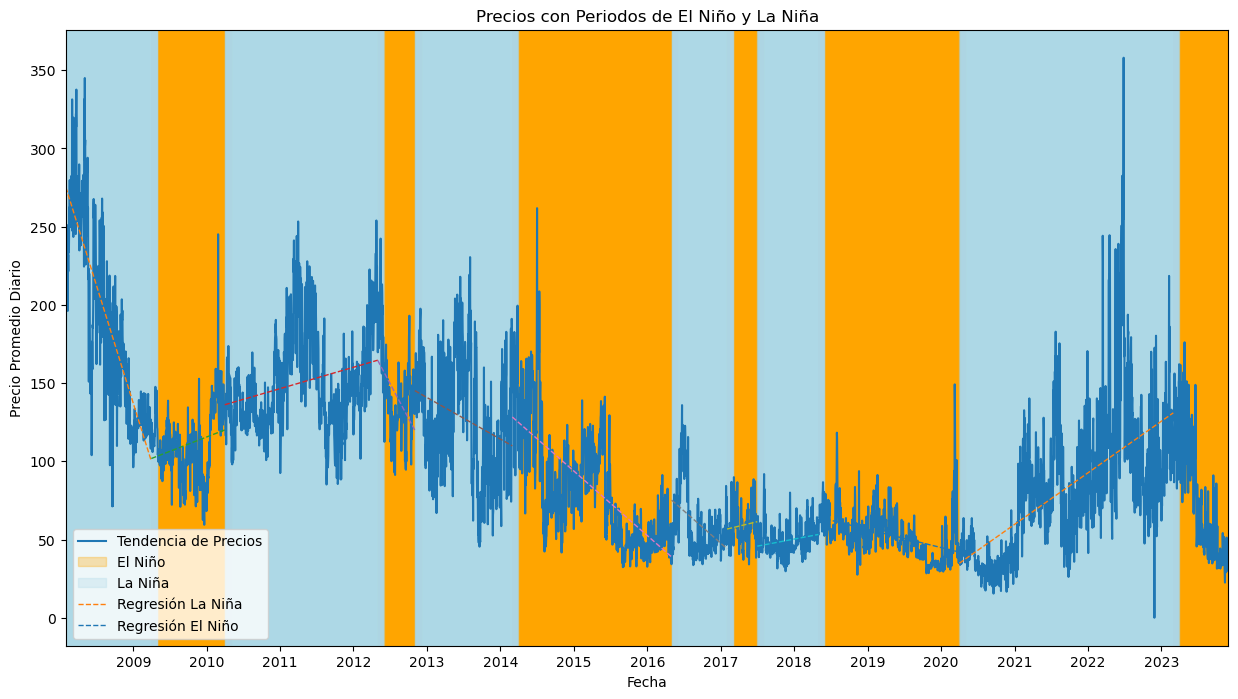

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

# Asumiendo que df_unido ya está cargado y preparado, y que los valores NaN en 'Condition' han sido rellenados

# Crear la figura y el eje
plt.figure(figsize=(15, 8))
ax = plt.gca()

# Dibujar el gráfico de línea con Seaborn
sns.lineplot(x='fecha', y='valor', data=df_unido, ax=ax, label='Tendencia de Precios')

# Añadir áreas sombreadas para El Niño y La Niña
conditions_set = set()
for condition, color in [('El Niño', 'orange'), ('La Niña', 'lightblue')]:
    df_condition = df_unido[df_unido['Condition'] == condition]
    for _, row in df_condition.iterrows():
        ax.axvspan(row['fecha'], row['fecha'] + pd.DateOffset(months=1), color=color, alpha=0.3, label=condition if condition not in conditions_set else "")
        conditions_set.add(condition)

# Identificar y almacenar los periodos
prev_condition = None
start_date = None
for idx, row in df_unido.iterrows():
    if prev_condition != row['Condition']:
        if prev_condition is not None and start_date is not None:
            # Calcular la regresión para el periodo previo
            period_data = df_unido[(df_unido['fecha'] >= start_date) & (df_unido['fecha'] <= row['fecha'])]
            x = mdates.date2num(period_data['fecha'])
            y = period_data['valor']
            if len(x) > 1 and len(y) > 1:  # Necesitamos al menos dos puntos para calcular la regresión lineal
                slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
                ax.plot(period_data['fecha'], intercept + slope * x, linestyle='--', linewidth=1, label=f'Regresión {prev_condition}')
        start_date = row['fecha']
    prev_condition = row['Condition']

# Ajustar los límites del eje x para coincidir con el rango de fechas de los datos
ax.set_xlim(df_unido['fecha'].min(), df_unido['fecha'].max())

# Formato del eje x
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Títulos y etiquetas
ax.set_title('Precios con Periodos de El Niño y La Niña')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio Promedio Diario')

# Mostrar la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Mostrar el gráfico
plt.show()


In [63]:
import pandas as pd
from scipy import stats

# Asumiendo que df_unido ya está cargado y preparado, y que los valores NaN en 'Condition' han sido rellenados

# Inicializar la lista para almacenar los resultados de las regresiones
resultados_regresion = []

# Identificar y calcular las regresiones para cada periodo
prev_condition = None
start_date = None
for idx, row in df_unido.iterrows():
    if prev_condition != row['Condition']:
        if prev_condition is not None and start_date is not None:
            # Calcular la regresión para el periodo previo
            period_data = df_unido[(df_unido['fecha'] >= start_date) & (df_unido['fecha'] <= row['fecha'])]
            x = mdates.date2num(period_data['fecha'])
            y = period_data['valor']
            if len(x) > 1 and len(y) > 1:  # Necesitamos al menos dos puntos para calcular la regresión lineal
                slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
                formula = f"y = {slope:.2e}x + {intercept:.2f}"
                resultados_regresion.append({
                    "fecha inicio": start_date,
                    "fecha final": row['fecha'],
                    "categoría": prev_condition,
                    "valor": f"{r_value:.2f}",
                    "regresión": formula
                })
        start_date = row['fecha']
    prev_condition = row['Condition']

# Crear DataFrame de resultados
df_resultados_regresion = pd.DataFrame(resultados_regresion)

# Mostrar la tabla de regresiones
print(df_resultados_regresion)


   fecha inicio fecha final categoría  valor                 regresión
0    2008-02-01  2009-04-01   La Niña  -0.85  y = -4.12e-01x + 6004.57
1    2009-04-01  2010-04-01   El Niño   0.24   y = 5.00e-02x + -615.24
2    2010-04-01  2012-05-01   La Niña   0.26   y = 3.74e-02x + -413.95
3    2012-05-01  2012-11-01   El Niño  -0.46  y = -2.42e-01x + 3910.76
4    2012-11-01  2014-03-01   La Niña  -0.27  y = -7.28e-02x + 1284.23
5    2014-03-01  2016-05-01   El Niño  -0.70  y = -1.13e-01x + 1949.97
6    2016-05-01  2017-02-01   La Niña  -0.41  y = -1.13e-01x + 1982.65
7    2017-02-01  2017-07-01   El Niño   0.11   y = 3.13e-02x + -481.97
8    2017-07-01  2018-05-01   La Niña   0.23   y = 2.46e-02x + -381.41
9    2018-05-01  2020-04-01   El Niño  -0.44   y = -3.18e-02x + 625.28
10   2020-04-01  2023-03-01   La Niña   0.62  y = 9.04e-02x + -1623.87


c:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



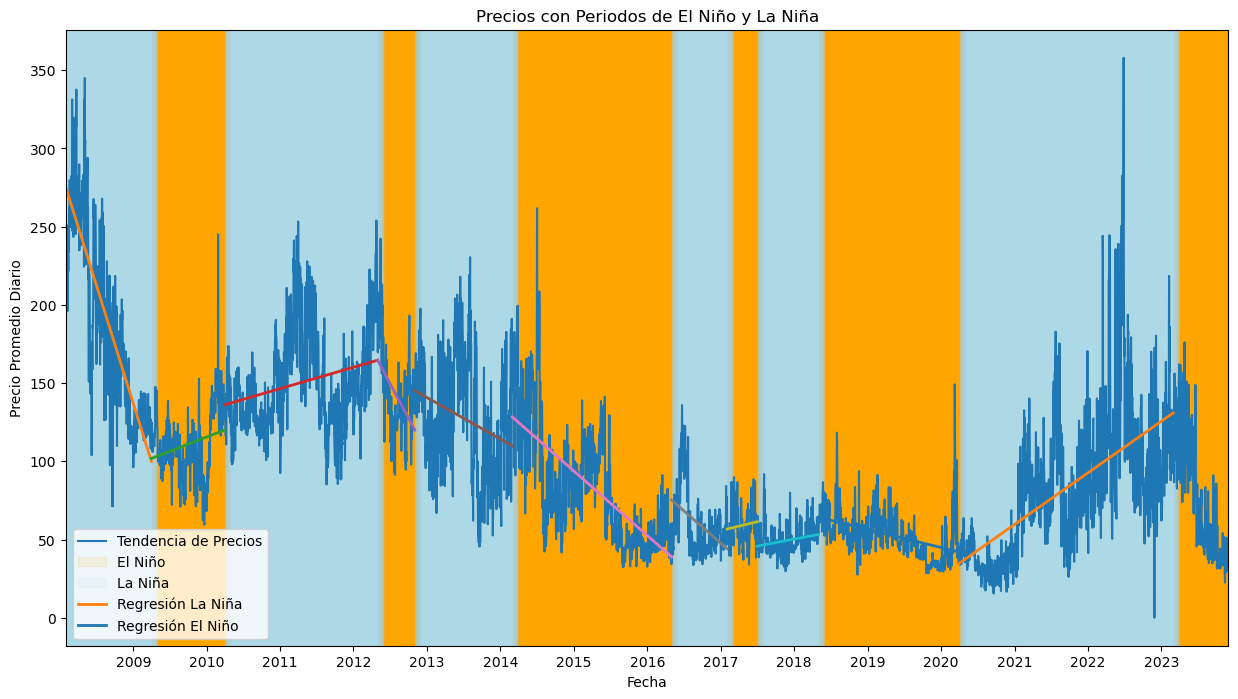

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

# Asumiendo que df_unido ya está cargado y preparado

# Crear la figura y el eje
plt.figure(figsize=(15, 8))
ax = plt.gca()

# Dibujar el gráfico de línea con Seaborn
sns.lineplot(x='fecha', y='valor', data=df_unido, ax=ax, label='Tendencia de Precios')

# Añadir áreas sombreadas para El Niño y La Niña con colores más suaves
conditions_set = set()
for condition, color, alpha in [('El Niño', 'orange', 0.1), ('La Niña', 'lightblue', 0.1)]:
    df_condition = df_unido[df_unido['Condition'] == condition]
    for _, row in df_condition.iterrows():
        ax.axvspan(row['fecha'], row['fecha'] + pd.DateOffset(months=1), color=color, alpha=alpha, label=condition if condition not in conditions_set else "")
        conditions_set.add(condition)

# Identificar y calcular las regresiones para cada periodo
prev_condition = None
start_date = None
for idx, row in df_unido.iterrows():
    if prev_condition != row['Condition']:
        if prev_condition is not None and start_date is not None:
            period_data = df_unido[(df_unido['fecha'] >= start_date) & (df_unido['fecha'] <= row['fecha'])]
            x = mdates.date2num(period_data['fecha'])
            y = period_data['valor']
            if len(x) > 1 and len(y) > 1:
                slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
                ax.plot(period_data['fecha'], intercept + slope * x, linestyle='-', linewidth=2, label=f'Regresión {prev_condition}')  # Línea más gruesa
        start_date = row['fecha']
    prev_condition = row['Condition']

# Ajustar los límites del eje x para coincidir con el rango de fechas de los datos
ax.set_xlim(df_unido['fecha'].min(), df_unido['fecha'].max())

# Formato del eje x
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Títulos y etiquetas
ax.set_title('Precios con Periodos de El Niño y La Niña')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio Promedio Diario')

# Mostrar la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Mostrar el gráfico
plt.show()


c:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



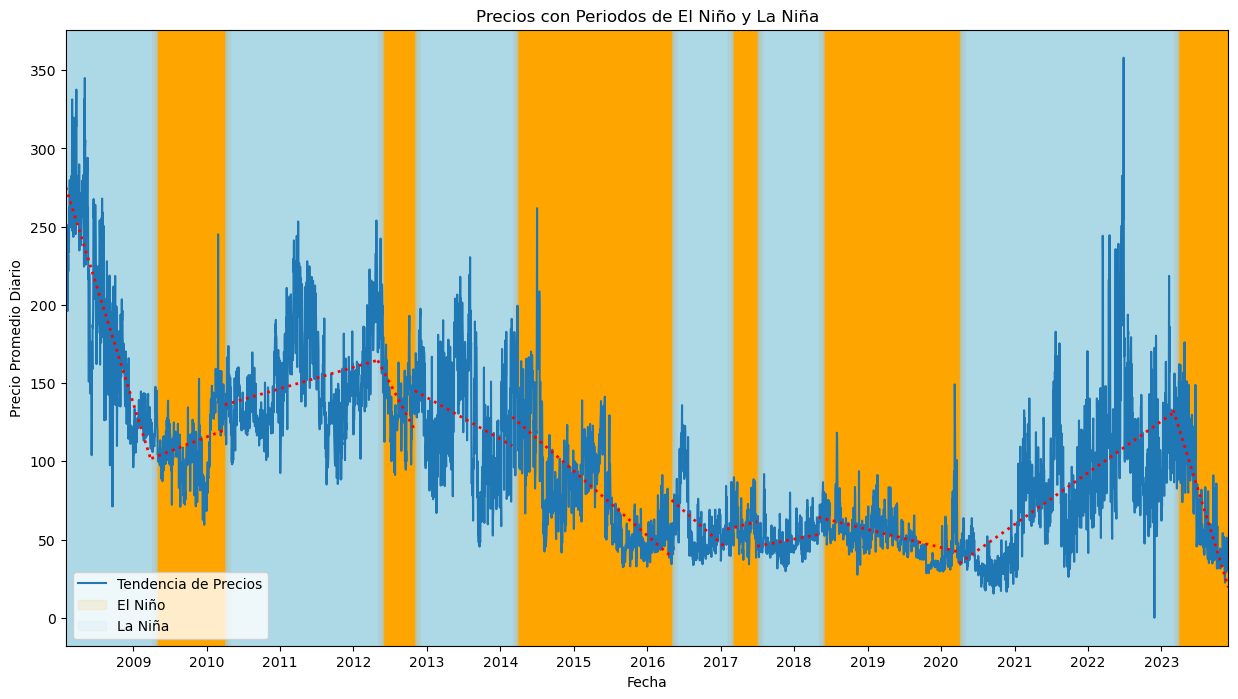

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

# Asumiendo que df_unido ya está cargado y preparado

# Crear la figura y el eje
plt.figure(figsize=(15, 8))
ax = plt.gca()

# Dibujar el gráfico de línea con Seaborn
sns.lineplot(x='fecha', y='valor', data=df_unido, ax=ax, label='Tendencia de Precios')

# Añadir áreas sombreadas para El Niño y La Niña con colores más suaves
conditions_set = set()
for condition, color, alpha in [('El Niño', 'orange', 0.1), ('La Niña', 'lightblue', 0.1)]:
    df_condition = df_unido[df_unido['Condition'] == condition]
    for _, row in df_condition.iterrows():
        if condition not in conditions_set:
            ax.axvspan(row['fecha'], row['fecha'] + pd.DateOffset(months=1), color=color, alpha=alpha, label=condition)
            conditions_set.add(condition)
        else:
            ax.axvspan(row['fecha'], row['fecha'] + pd.DateOffset(months=1), color=color, alpha=alpha)

# Identificar y calcular las regresiones para cada periodo
prev_condition = None
start_date = None
for idx, row in df_unido.iterrows():
    if prev_condition != row['Condition'] or idx == len(df_unido) - 1:
        if prev_condition is not None and start_date is not None:
            end_date = row['fecha'] if idx < len(df_unido) - 1 else df_unido['fecha'].iloc[-1]
            period_data = df_unido[(df_unido['fecha'] >= start_date) & (df_unido['fecha'] <= end_date)]
            x = mdates.date2num(period_data['fecha'])
            y = period_data['valor']
            if len(x) > 1 and len(y) > 1:
                slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
                ax.plot(period_data['fecha'], intercept + slope * x, linestyle=':', linewidth=2, color='red')  # Línea punteada roja
        start_date = row['fecha']
    prev_condition = row['Condition']

# Ajustar los límites del eje x para coincidir con el rango de fechas de los datos
ax.set_xlim(df_unido['fecha'].min(), df_unido['fecha'].max())

# Formato del eje x
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Títulos y etiquetas
ax.set_title('Precios con Periodos de El Niño y La Niña')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio Promedio Diario')

# Mostrar la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Mostrar el gráfico
plt.show()


In [75]:
df_unido

,fecha,valor,Temperature,Date,Condition
0,2008-02-01,226.22250,-1.3,2008-02-01,La Niña
1,2008-02-02,224.57625,NaN,NaT,La Niña
2,2008-02-03,208.80125,NaN,NaT,La Niña
3,2008-02-04,217.09750,NaN,NaT,La Niña
4,2008-02-05,212.99125,NaN,NaT,La Niña
...,...,...,...,...,...
5777,2023-11-26,37.33250,NaN,NaT,El Niño
5778,2023-11-27,45.60750,NaN,NaT,El Niño
5779,2023-11-28,34.50500,NaN,NaT,El Niño
5780,2023-11-29,29.79875,NaN,NaT,El Niño


In [79]:
import pandas as pd
from scipy import stats
import matplotlib.dates as mdates

# Asumiendo que df_unido ya está cargado y preparado

# Inicializar la lista para almacenar los resultados de las regresiones
resultados_regresion = []

# Identificar y calcular las regresiones para cada periodo
prev_condition = None
start_date = None
for idx, row in df_unido.iterrows():
    # Comprobar si cambió la condición o si es el último registro
    if prev_condition != row['Condition'] or idx == len(df_unido) - 1:
        if prev_condition is not None and start_date is not None:
            # Determinar la fecha final del periodo
            end_date = row['fecha'] if idx < len(df_unido) - 1 else df_unido['fecha'].iloc[-1]
            # Calcular la regresión para el periodo
            period_data = df_unido[(df_unido['fecha'] >= start_date) & (df_unido['fecha'] <= end_date)]
            x = mdates.date2num(period_data['fecha'])
            y = period_data['valor']
            if len(x) > 1 and len(y) > 1:  # Necesitamos al menos dos puntos para calcular la regresión lineal
                slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
                r_squared = r_value ** 2  # Calcular el coeficiente de determinación
                formula = f"y = {slope:.2e}x + {intercept:.2f}"
                resultados_regresion.append({
                    "fecha inicio": start_date,
                    "fecha final": end_date,
                    "categoría": prev_condition,
                    "valor": f"{r_value:.2f}",
                    "coeficiente determinacion": f"{r_squared:.2f}",
                    "regresión": formula
                })
        start_date = row['fecha']
    prev_condition = row['Condition']

# Crear DataFrame de resultados
df_resultados_regresion = pd.DataFrame(resultados_regresion)

# Mostrar la tabla de regresiones
print(df_resultados_regresion)


   fecha inicio fecha final categoría  valor coeficiente determinacion  \
0    2008-02-01  2009-04-01   La Niña  -0.85                      0.72   
1    2009-04-01  2010-04-01   El Niño   0.24                      0.06   
2    2010-04-01  2012-05-01   La Niña   0.26                      0.07   
3    2012-05-01  2012-11-01   El Niño  -0.46                      0.21   
4    2012-11-01  2014-03-01   La Niña  -0.27                      0.07   
5    2014-03-01  2016-05-01   El Niño  -0.70                      0.49   
6    2016-05-01  2017-02-01   La Niña  -0.41                      0.17   
7    2017-02-01  2017-07-01   El Niño   0.11                      0.01   
8    2017-07-01  2018-05-01   La Niña   0.23                      0.06   
9    2018-05-01  2020-04-01   El Niño  -0.44                      0.19   
10   2020-04-01  2023-03-01   La Niña   0.62                      0.38   
11   2023-03-01  2023-11-30   El Niño  -0.85                      0.72   

                   regresión  
0   y 

In [80]:
df_resultados_regresion

,fecha inicio,fecha final,categoría,valor,coeficiente determinacion,regresión
0,2008-02-01,2009-04-01,La Niña,-0.85,0.72,y = -4.12e-01x + 6004.57
1,2009-04-01,2010-04-01,El Niño,0.24,0.06,y = 5.00e-02x + -615.24
2,2010-04-01,2012-05-01,La Niña,0.26,0.07,y = 3.74e-02x + -413.95
3,2012-05-01,2012-11-01,El Niño,-0.46,0.21,y = -2.42e-01x + 3910.76
4,2012-11-01,2014-03-01,La Niña,-0.27,0.07,y = -7.28e-02x + 1284.23
5,2014-03-01,2016-05-01,El Niño,-0.70,0.49,y = -1.13e-01x + 1949.97
6,2016-05-01,2017-02-01,La Niña,-0.41,0.17,y = -1.13e-01x + 1982.65
7,2017-02-01,2017-07-01,El Niño,0.11,0.01,y = 3.13e-02x + -481.97
8,2017-07-01,2018-05-01,La Niña,0.23,0.06,y = 2.46e-02x + -381.41
9,2018-05-01,2020-04-01,El Niño,-0.44,0.19,y = -3.18e-02x + 625.28


In [81]:
import pandas as pd
from scipy import stats
import matplotlib.dates as mdates

# Asumiendo que df_unido ya está cargado y preparado

# Función para calcular la regresión lineal y devolver los resultados
def calcular_regresion(df, categoria):
    x = mdates.date2num(df['fecha'])
    y = df['valor']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value ** 2
    formula = f"y = {slope:.2e}x + {intercept:.2f}"
    return {
        "categoría": categoria,
        "coeficiente determinacion": f"{r_squared:.2f}",
        "regresión": formula
    }

# Calcular regresiones para El Niño, La Niña y el dataset completo
resultados = []
for categoria in ["El Niño", "La Niña"]:
    df_categoria = df_unido[df_unido['Condition'] == categoria].sort_values(by='fecha')
    if not df_categoria.empty:
        resultados.append(calcular_regresion(df_categoria, categoria))

# Calcular la regresión para el dataset completo
resultados.append(calcular_regresion(df_unido, "Total"))

# Crear DataFrame de resultados
df_resultados_regresion = pd.DataFrame(resultados)

# Mostrar la tabla de regresiones
print(df_resultados_regresion)


  categoría coeficiente determinacion                regresión
0   El Niño                      0.28  y = -1.38e-02x + 315.03
1   La Niña                      0.38  y = -2.05e-02x + 455.36
2     Total                      0.34  y = -1.89e-02x + 417.10


In [82]:
df_resultados_regresion

,categoría,coeficiente determinacion,regresión
0,El Niño,0.28,y = -1.38e-02x + 315.03
1,La Niña,0.38,y = -2.05e-02x + 455.36
2,Total,0.34,y = -1.89e-02x + 417.10


In [83]:
import pandas as pd

# Ruta del archivo subido
file_path = r'C:\Users\Lenovo\Downloads\2014-2.tsv'

# Cargando el archivo en un DataFrame de pandas
# Suponiendo que el archivo está separado por tabulaciones (TSV)
df = pd.read_csv(file_path, sep='\t')

# Mostrando las primeras filas del DataFrame para verificar la carga correcta
df.head()


,fecha_opreal,hora_opreal,central_infotecnica_id,central_nombre,central_tipo,central_tipo_nemotecnico,generacion_real_mwh,generacion_real_ernc_mwh
0,2014-02-01,17,198,TER NEHUENCO II,Térmica,termica,352.0,0.0
1,2014-02-01,17,227,TER VIÑALES,Térmica,termica,21.7,21.7
2,2014-02-01,17,74,HP QUELTEHUES,Hidráulica,hidraulica,41.0,0.0
3,2014-02-01,17,178,HE PANGUE,Hidráulica,hidraulica,50.0,0.0
4,2014-02-01,1,66,PMGD TER CASABLANCA II,Térmica,termica,0.0,0.0


In [84]:
df

,fecha_opreal,hora_opreal,central_infotecnica_id,central_nombre,central_tipo,central_tipo_nemotecnico,generacion_real_mwh,generacion_real_ernc_mwh
0,2014-02-01,17,198,TER NEHUENCO II,Térmica,termica,352.0,0.0
1,2014-02-01,17,227,TER VIÑALES,Térmica,termica,21.7,21.7
2,2014-02-01,17,74,HP QUELTEHUES,Hidráulica,hidraulica,41.0,0.0
3,2014-02-01,17,178,HE PANGUE,Hidráulica,hidraulica,50.0,0.0
4,2014-02-01,1,66,PMGD TER CASABLANCA II,Térmica,termica,0.0,0.0
...,...,...,...,...,...,...,...,...
149851,2014-02-28,24,92,HE COLBÚN,Hidráulica,hidraulica,160.0,0.0
149852,2014-02-28,24,33,TER LOMA LOS COLORADOS,Térmica,termica,0.5,0.5
149853,2014-02-28,24,252,TER CMPC LAJA,Térmica,termica,22.9,22.9
149854,2014-02-28,24,19,PE LEBU,Eólica,eolica,0.0,0.0
